<a href="https://colab.research.google.com/github/hellen2021/Introduction-to-Linear-Regression/blob/main/Copy_of_Linear_regression_intro_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples
We will now perform our first predictions. Consider [this data set](https://drive.google.com/file/d/13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d/view?usp=sharing) which tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Our aim will be to predict one's chance of getting into grad school. Let's begin by taking a look at the data


In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:

#load the data
url = 'https://drive.google.com/file/d/13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)


#displaying the dataset
data.head()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.shape

(500, 9)

You should see 500 entries, and 9 columns. Let's also get a description of the data

In [ ]:
data.describe()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's start by focusing on a single variable: the GRE score 

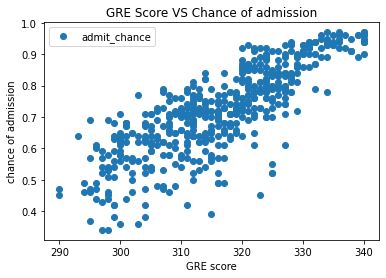

In [ ]:
import matplotlib.pyplot as plt

data.plot(x='GRE', y='admit_chance', style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()



We can clearly see that there is a relationship between GRE scores and chances of admission. While there are some outliers, we will now build a linear regression model to predict admission chance based on GRE results. First, we set up our train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

X = data['GRE'].values.reshape(-1, 1)
y = data['admit_chance'].values#.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
GRE_train, GRE_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)



This should be familiar so far, time to actually create the model. We will create a regressor object, and train it using our train data

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(GRE_train, admit_train)

#The fit method will look for our optimal line. More info on this method and others
# at the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-2.5488126924084584
[0.01033718]


How good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict chances of admission based on those GRE scores we set aside, then compare that to the actual chances from the original dataset.

In [ ]:
admit_predict = regressor.predict(GRE_test)

comparison_frame = pd.DataFrame({'Actual': admit_test.flatten(), 'Predicted': admit_predict.flatten()})

comparison_frame.describe()
  

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.706884
std,0.13282,0.115189
min,0.39000,0.500657
25%,0.60000,0.614366
50%,0.70500,0.717738
75%,0.80000,0.800435
max,0.96000,0.945156


Our model is not too bad, although you can see that it can be off, as with the min value. Let's visualize it for a better intuition

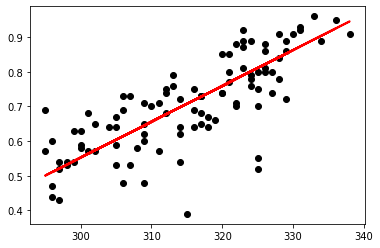

In [ ]:
plt.scatter(GRE_test, admit_test, color='black')
plt.plot(GRE_test, admit_predict, color='red', linewidth=2)
plt.show()

We have some outliers, but our line is nicely centered. While visualizations like this are helpful in assessing our line of best fit, sklearn comes with some crucial metrics for linear regressions

In [ ]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(admit_test, admit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(admit_test, admit_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(admit_test, admit_predict)))  


Mean Absolute Error: 0.0636984910033071
Mean Squared Error: 0.00726745943092683
Root Mean Squared Error: 0.0852493954871636


How do we make sense of the numbers above? You shoud read through [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) for formal definitions of the metrics above, but bear in mind the following:



*   We will use these metrics (particularly RMSE) to compare models to each other. The lower the value the better.
*   These values are relative to our dependent variable, i.e our dependent variable ranges from 0.39 to 0.96, with a mean of 0.7 and standard deviation of 0.13. This makes an RMSE of 0.085 somewhat acceptable. If our data ranged from 0 to 10, an RMSE of 0.085 would be incredible!

Let's see if we can improve our model by bringing in new independent variables. Let's start by plotting TOEFL scores against admission chance



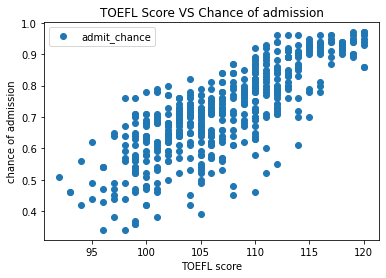

In [ ]:
import matplotlib.pyplot as plt

data.plot(x='TOEFL', y='admit_chance', style='o')
plt.title('TOEFL Score VS Chance of admission')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admission')
plt.show()


Once again, we can see that there is a relationship between TOEFL score and chance of admission. Let's perform a multivariate linear regression using both GRE and TOEFL scores as independent variables.

In [ ]:
X = data[['GRE', 'TOEFL']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

It is interesting at this point to check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable

In [ ]:
regressor.coef_


array([0.00641501, 0.00867603])

In this case, we can see that a single point change in your Toefl score would influence your chances slightly more than a similar 1 point change in GRE scores. 

At this point, let's compare our predicted results to the actual data from the test set:


In [ ]:
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.708793
std,0.13282,0.115286
min,0.39000,0.485892
25%,0.60000,0.618885
50%,0.70500,0.701137
75%,0.80000,0.798953
max,0.96000,0.950717


Slight improvements! This should be echoed in our key metrics being smaller than our single variable linear model

In [ ]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.058487235725409016
Mean Squared Error: 0.006246893942643228
Root Mean Squared Error: 0.07903729463135253


It is now time for some challenges!

# Challenge 1

Using the same dataset, find out which of the available variables has the largest **weight** in predicting acceptance into university.



In [ ]:
data.head(2)

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [ ]:
# train = data.iloc[:, :-1].values
# test = data.iloc[:, -1].values

feature importances are done for the non parametric models such as decision trees, while for parametric models such as linear regression, we use coef_

In [ ]:
# # split
# x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 0)

# reg = LinearRegression()
# reg.fit(x_train, y_train)

# reg.coef_

In [ ]:
# similarly
train = data.drop('admit_chance', axis = 1)
test = data['admit_chance']

x = train.values
y = test.values

# split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

reg = LinearRegression()
reg.fit(x, y)
reg.coef_

array([8.68010696e-05, 1.92167454e-03, 3.19276146e-03, 5.31642721e-03,
       4.56606127e-03, 1.49151378e-02, 1.15556128e-01, 2.25254076e-02])

In [ ]:
# printing the coefficients with their corresponding ind var as a dataframe
pd.DataFrame(reg.coef_, 
             train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
CGPA,0.115556
publications,0.022525
LOR,0.014915
uni_rating,0.005316
SOP,0.004566
TOEFL,0.003193
GRE,0.001922
Serial No.,0.000087


# Challenge 2

Take a look at this [dataset](https://drive.google.com/file/d/1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4/view?usp=sharing) on wine quality. You will have to build a multivariate model that predicts the **quality** of the wine, but with a key constraint: you may only use 4 variables from the 11 independent variables available to you. 

How can you pick the 4 most relevant independent variables? recall your learnings from module 1.

Compute your metrics, and compare with your peers. How did each of you achieve their results? 

Hint: recall reduction techniques, you want to pick independent variables that are as unrelated to each other as possible

In [ ]:
#load the data
url = 'https://drive.google.com/file/d/1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
wine = pd.read_csv(dwn_url)

wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
wine.columns = wine.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.isnull().sum()

# no missing values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# dimensionality reduction


In [ ]:
# separating the predictor from the target variable
wine_train = wine.drop('quality', axis = 1)
wine_test = wine['quality']

x = wine_train.values
y = wine_test

# instantiate the linear regresson model
linregg = LinearRegression()

# fitting the model
linregg.fit(x, y)

# coefficients
linregg.coef_

# printing the coefficients with their corresponding ind var as a dataframe
pd.DataFrame(linregg.coef_, 
             wine_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


,coef
sulphates,0.916334
alcohol,0.276198
fixed_acidity,0.024991
residual_sugar,0.016331
free_sulfur_dioxide,0.004361
total_sulfur_dioxide,-0.003265
citric_acid,-0.182564
ph,-0.413653
volatile_acidity,-1.083590
chlorides,-1.874225


Because of the logit function, logistic regression coefficients represent the log odds that an observation is in the target class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds in order to make sense of them. Happily, this is done by simply exponentiating the log odds coefficients, which you can do with np.exp():

In [ ]:
# split
train = wine[['sulphates', 'alcohol', 'fixed_acidity', 'residual_sugar']].values
test = wine['quality'].values

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 0)

# object
linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg.coef_

array([ 0.86991675,  0.35670138,  0.06091017, -0.00787823])

In [ ]:
y_pred = linreg.predict(x_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,320.000000,320.000000
mean,5.593750,5.653750
std,0.757796,0.427517
min,3.000000,4.870918
25%,5.000000,5.311776
50%,6.000000,5.583491
75%,6.000000,5.948684
max,8.000000,6.962279


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4904491773443273
Mean Squared Error: 0.4091428141568342
Root Mean Squared Error: 0.6396427238363883


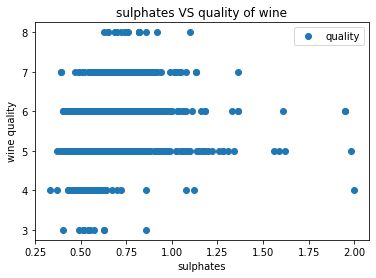

In [ ]:
wine.plot(x='sulphates', y='quality', style='o')
plt.title('sulphates VS quality of wine')
plt.xlabel('sulphates')
plt.ylabel('wine quality')
plt.show()


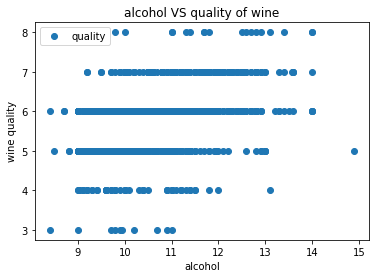

In [ ]:
wine.plot(x='alcohol', y='quality', style='o')
plt.title('alcohol VS quality of wine')
plt.xlabel('alcohol')
plt.ylabel('wine quality')
plt.show()

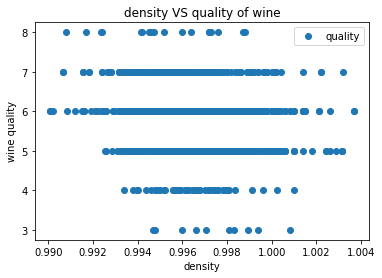

In [ ]:
wine.plot(x='density', y='quality', style='o')
plt.title('density VS quality of wine')
plt.xlabel('density')
plt.ylabel('wine quality')
plt.show()

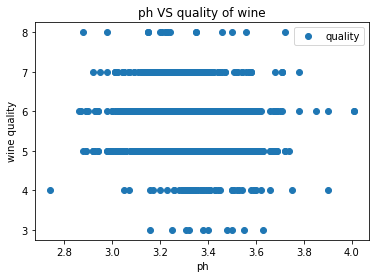

In [ ]:
wine.plot(x='ph', y='quality', style='o')
plt.title('ph VS quality of wine')
plt.xlabel('ph')
plt.ylabel('wine quality')
plt.show()

In [ ]:
# test for the last four predictors

In [ ]:
# split
train = wine[['ph', 'volatile_acidity', 'chlorides', 'density']].values
test = wine['quality'].values

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 0)

# object
linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg.coef_

array([ -0.21567846,  -1.70531519,  -1.45668943, -70.98878998])

In [ ]:
y_pred = linreg.predict(x_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,320.000000,320.000000
mean,5.593750,5.664390
std,0.757796,0.336726
min,3.000000,4.846778
25%,5.000000,5.405493
50%,6.000000,5.653679
75%,6.000000,5.918937
max,8.000000,6.630346


In [ ]:
y_pred = linreg.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.537014544990693
Mean Squared Error: 0.47887947651172247
Root Mean Squared Error: 0.692011182360316
